# Make figures for presentations

This notebook generates figures that are useful for presentations (larger text, no subfigures, transparent background). **No results are calculated here**. We'll only load the results from files produced by other notebooks. All figures will be saved in png format to the `presentation_figures` folder.

## Package imports

In [1]:
# Insert the plots into the notebook
%matplotlib inline

In [2]:
from __future__ import division
import cPickle as pickle
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
import seaborn  # Makes the default style of the plots nicer

/home/leo/bin/anaconda/envs/moho/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from datasets import fetch_crust1, load_icgem_gdf, down_sample, fetch_assumpcao_moho_points
from mohoinv import predict_seismic

Create the output folder, if it doesn't exist.

In [4]:
!mkdir -p presentation_figures

Set the global plot style parameters.

In [5]:
seaborn.set_context('poster')
config = dict(fontsize=12)
plt.rcParams['font.size'] = config['fontsize']
plt.rcParams['axes.labelsize'] = config['fontsize']
plt.rcParams['xtick.labelsize'] = config['fontsize']
plt.rcParams['ytick.labelsize'] = config['fontsize']
plt.rcParams['legend.fontsize'] = config['fontsize']
plt.rcParams['xtick.major.pad'] = 3
plt.rcParams['ytick.major.pad'] = 3

In [6]:
saveargs = dict(transparent=True, dpi=300)

The function below takes the data and sets the colorbar limits so that zero falls in the middle of the color range.

In [7]:
def data_minmax(data, shift=0):
    ranges = np.abs([data.min(), data.max()]).max()
    return dict(vmin=-ranges + shift, vmax=ranges + shift)

## CRUST1.0 synthetic

Makes the figures for the CRUST1.0 based synthetic data test.

Load the model, data, and inversion results.

In [8]:
with open('../model/synthetic-crust1.pickle') as f:
    model = pickle.load(f)

In [9]:
with open('../data/synthetic-data-crust1.txt') as f:
    for i in range(2):
        f.readline()
    line = f.readline()
    shape = map(int, line.split()[1:])
    lat, lon, height, data = np.loadtxt(f, unpack=True, usecols=[0, 1, 2, 4])

In [10]:
latp, lonp, depthp = np.loadtxt('../data/crust1-point-depths.txt', unpack=True)

In [11]:
with zipfile.ZipFile('results/synthetic-crust1.zip') as f:
    results = pickle.load(f.open('synthetic-crust1.pickle'))

In [12]:
results.keys()

['models_refdens',
 'densities',
 'reference_levels',
 'solution_regul',
 'scores_regul',
 'models_regul',
 'solution',
 'best_dens',
 'scores_refdens',
 'best_regul',
 'regul_params',
 'config',
 'best_ref',
 'metadata']

In [13]:
print(results['metadata'])

Generated by sinthetic-crust1.ipynb on 05 February 2016 21:48:27 UTC


Make the map projection for these plots.

In [14]:
bm = Basemap(projection='cyl', 
             llcrnrlon=model.area[2], urcrnrlon=model.area[3], 
             llcrnrlat=model.area[0], urcrnrlat=model.area[1],
             resolution='l')

Plot the model and the synthetic gravity and seismological data.

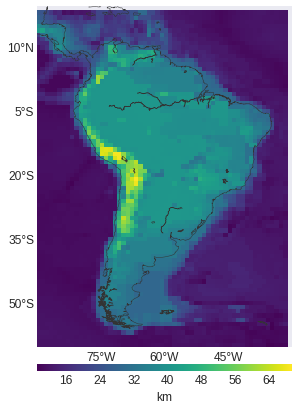

In [15]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
x, y = bm(model.lon.reshape(model.shape), model.lat.reshape(model.shape))
tmp = bm.pcolormesh(x, y, -0.001*model.relief.reshape(model.shape), cmap='viridis')
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=8))
cb.set_label_text('km')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)


plt.savefig('presentation_figures/synthetic-crust1-model.png', **saveargs)

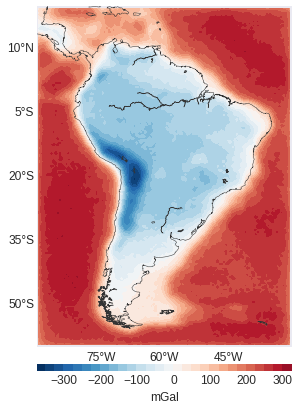

In [16]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
x, y = bm(lon.reshape(shape), lat.reshape(shape))
tmp = bm.contourf(x, y, data.reshape(shape), 30, cmap='RdBu_r', **data_minmax(data))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=8))
cb.set_label_text('mGal')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)

plt.savefig('presentation_figures/synthetic-crust1-data.png', **saveargs)

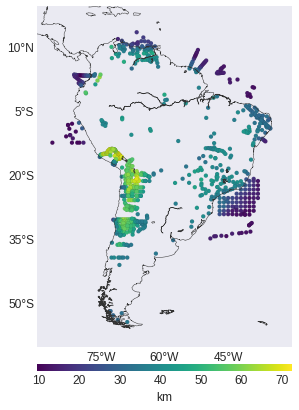

In [17]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
xp, yp = bm(lonp, latp)
tmp = bm.scatter(xp, yp, c=depthp*0.001, s=17, cmap='viridis',
                 linewidths=0.05)
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=8))
cb.set_label_text('km')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)

plt.savefig('presentation_figures/synthetic-crust1-seismic.png', **saveargs)

Extract some things from the results dictionary.

In [18]:
moho = results['solution'].estimate_    
solution = results['solution'][0]
residuals = solution.residuals()
regul_params = results['regul_params']
scores_regul = results['scores_regul']
best_reg = results['best_regul']
reference_levels = results['reference_levels']
densities = results['densities']
scores_refdens = results['scores_refdens']
best_ref = results['best_ref']
best_dens = results['best_dens']
diff_seismic = -0.001*(-depthp - predict_seismic(moho, latp, lonp))
diff_model = -0.001*(model.relief - moho.relief).reshape(moho.shape)

In [19]:
diff_model.max(),  diff_model.min()

(9.8358547811799735, -8.2322778445448286)

In [20]:
diff_seismic.max(),  diff_seismic.min()

(9.4374315564211066, -7.5973400319479261)

In [21]:
regul_params[best_reg]

0.0001

Make a figure of the inversion results.

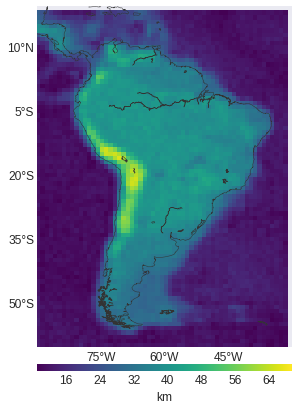

In [22]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
x, y = bm(moho.lons, moho.lats)
vmin, vmax = [func(-0.001*model.relief) for func in [np.min, np.max]]
tmp = bm.pcolormesh(x, y, -0.001*moho.relief.reshape(moho.shape), cmap='viridis',
                    vmin=vmin, vmax=vmax)
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=8))
cb.set_label_text('km')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)

plt.savefig('presentation_figures/synthetic-crust1-res-moho.png', **saveargs)

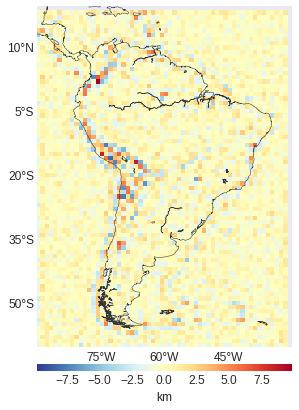

In [23]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
x, y = bm(moho.lons, moho.lats)
tmp = bm.pcolormesh(x, y, diff_model, cmap='RdYlBu_r', **data_minmax(diff_model))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=8))
cb.set_label_text('km')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)

plt.savefig('presentation_figures/synthetic-crust1-res-diff.png', **saveargs)

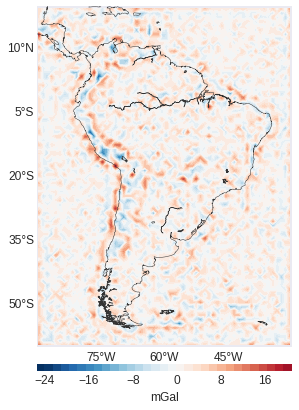

In [24]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
x, y = bm(solution.lon, solution.lat)
tmp = bm.contourf(x, y, residuals, 30, tri=True, cmap='RdBu_r', **data_minmax(residuals))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=8))
cb.set_label_text('mGal')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)

plt.savefig('presentation_figures/synthetic-crust1-res-residual.png', **saveargs)

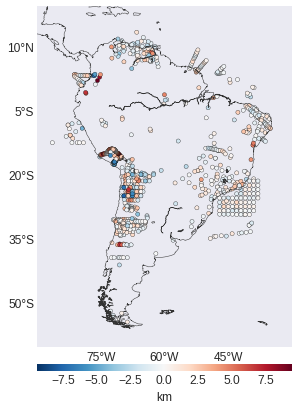

In [25]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
xp, yp = bm(lonp, latp)
tmp = bm.scatter(xp, yp, c=diff_seismic, s=17, cmap='RdBu_r',
                 linewidths=0.3, **data_minmax(diff_seismic))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=8))
cb.set_label_text('km')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)

plt.savefig('presentation_figures/synthetic-crust1-res-diff-seismic.png', **saveargs)

/home/leo/bin/anaconda/envs/moho/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


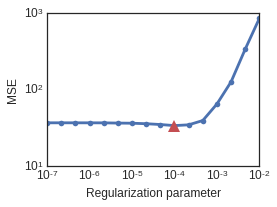

In [26]:
with seaborn.axes_style('white'):
    fig = plt.figure(figsize=(4, 3))
    ax = plt.subplot(111)
    ax.plot(regul_params, scores_regul, marker='.')
    ax.plot(regul_params[best_reg], scores_regul[best_reg], '^', 
            color=seaborn.color_palette()[2], 
            label='Minimum')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Regularization parameter')
    ax.set_ylabel(u'MSE')
    plt.tight_layout()

plt.savefig('presentation_figures/synthetic-crust1-cv-mu.png', **saveargs)

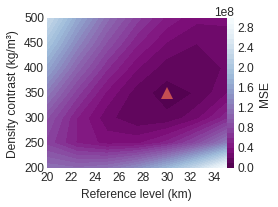

In [27]:
with seaborn.axes_style('darkgrid'):
    fig = plt.figure(figsize=(4, 3))
    ax = plt.subplot(111)    
    tmp = ax.contourf(-0.001*reference_levels, densities, scores_refdens, 30, cmap='BuPu_r')
    divider = make_axes_locatable(ax)
    cbax = divider.append_axes("right", size=0.1, pad=0.01)
    plt.colorbar(tmp, cax=cbax).set_label('MSE')
    ax.plot(-0.001*reference_levels[best_ref], densities[best_dens], '^', 
            color=seaborn.color_palette()[2], label='Minimum')
    ax.set_xlabel('Reference level (km)')
    ax.set_ylabel(u'Density contrast (kg/m³)')    
    plt.tight_layout()

plt.savefig('presentation_figures/synthetic-crust1-cv-drhozref.png', **saveargs)

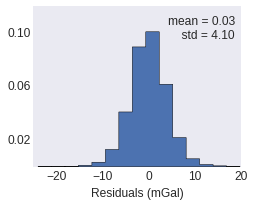

In [28]:
with seaborn.axes_style('dark'):
    fig = plt.figure(figsize=(3.7, 3))
    ax = plt.subplot(111)    
    text = "mean = {:.2f}\n    std = {:.2f}".format(
        residuals.mean(), residuals.std())
    ax.text(0.65, 0.8, text, transform=ax.transAxes, **config)
    ax.hist(residuals, bins=15, normed=True, histtype='stepfilled')
    ax.set_xlabel('Residuals (mGal)')
    ax.set_xticks(ax.get_xticks()[1::2])
    ax.set_yticks(ax.get_yticks()[1::2])
    plt.tight_layout()

plt.savefig('presentation_figures/synthetic-crust1-res-residuals-hist.png', **saveargs)

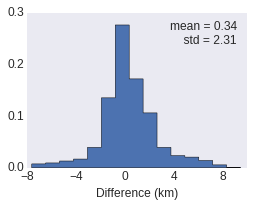

In [29]:
with seaborn.axes_style('dark'):
    fig = plt.figure(figsize=(3.7, 3))
    ax = plt.subplot(111)    
    text = "mean = {:.2f}\n    std = {:.2f}".format(
        diff_seismic.mean(), diff_seismic.std())
    ax.text(0.65, 0.8, text, transform=ax.transAxes, **config)
    ax.hist(diff_seismic, bins=15, normed=True, histtype='stepfilled')
    ax.set_xlabel('Difference (km)')
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_yticks(ax.get_yticks()[::2])
    plt.tight_layout()

plt.savefig('presentation_figures/synthetic-crust1-res-diff-seismic-hist.png', **saveargs)

## Data for the South America application

Load the processed gravity data.

In [30]:
with open('../data/processed-goco5s-data-sam-h50km.txt') as f:
    for i in range(2):
        f.readline()
    shape = tuple(int(i) for i in f.readline().split()[1:])
    data = np.loadtxt(f, unpack=True)
    lat, lon, height, topo, grav, disturbance, topo_effect, bouguer = data[:8]
    upper_sed, middle_sed, lower_sed, total_sed, sedfree_bouguer = data[8:]
    area = (lat.min(), lat.max(), lon.min(), lon.max())

Load the sediment model from CRUST1.0.

In [31]:
crust1 = fetch_crust1('../data/crust1.0.tar.gz').cut(area)

Load the seismic point estimates of Moho depth from [Assumpção et al. (2013)](http://dx.doi.org/10.1016%2Fj.tecto.2012.11.014).

In [32]:
seismic_data = fetch_assumpcao_moho_points('../data/Moho_Map_SAm2013_data.tar.gz', 
                                           todepth=True, return_height=False)
latp, lonp, seismic_moho = seismic_data[:-1]
lonp += 360

Setup a [basemap](http://matplotlib.org/basemap/index.html) to plot the data with an appropriate projection.

In [33]:
bm = Basemap(projection='cyl', 
             llcrnrlon=area[2], urcrnrlon=area[3], 
             llcrnrlat=area[0], urcrnrlat=area[1],
             lon_0=0.5*(area[2] + area[3]), lat_0=0.5*(area[1] + area[0]), 
             resolution='l')

Convert the data, CRUST1.0, and seismic data coordinates to the projection.

In [34]:
x, y = bm(lon.reshape(shape), lat.reshape(shape))

In [35]:
xc, yc = bm(crust1.lon + 360, crust1.lat)

In [36]:
xp, yp = bm(lonp, latp)

Plot maps of the stages in the data correction, topography, and the sediment model used.

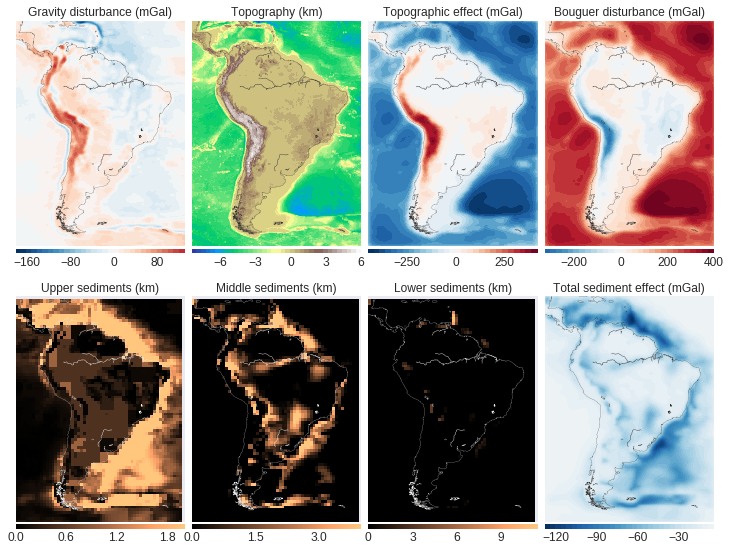

In [37]:
fig = plt.figure(figsize=(10, 7.5))

grid = AxesGrid(fig, [0.015, 0.01, 0.97, 0.98], 
                nrows_ncols=(2, 4), axes_pad=(0.1, 0.6),
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="1%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
ax.set_title('Gravity disturbance (mGal)', **config)
tmp = bm.contourf(x, y, disturbance.reshape(shape), 30, cmap='RdBu_r', 
                  **data_minmax(disturbance))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=5))
bm.drawcoastlines(color="#333333", linewidth=0.2)

i = 1
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
ax.set_title('Topography (km)', **config)
tmp = bm.contourf(x, y, 0.001*topo.reshape(shape), 40, cmap='terrain')
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=5))
bm.drawcoastlines(color="#333333", linewidth=0.2)

i = 2
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
ax.set_title('Topographic effect (mGal)', **config)
tmp = bm.contourf(x, y, topo_effect.reshape(shape), 30, cmap='RdBu_r', 
                  **data_minmax(topo_effect))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=5))
bm.drawcoastlines(color="#333333", linewidth=0.2)

i = 3
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
ax.set_title('Bouguer disturbance (mGal)', **config)
tmp = bm.contourf(x, y, bouguer.reshape(shape), 30, cmap='RdBu_r', 
                  **data_minmax(bouguer))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=5))
bm.drawcoastlines(color="#333333", linewidth=0.2)

i = 4
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
ax.set_title('Upper sediments (km)', **config)
tmp = bm.pcolormesh(xc, yc, 0.001*crust1.upper_sediments.thickness, cmap='copper')
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=4))
bm.drawcoastlines(color="#eeeeee", linewidth=0.2)

i = 5
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
ax.set_title('Middle sediments (km)', **config)
tmp = bm.pcolormesh(xc, yc, 0.001*crust1.middle_sediments.thickness, cmap='copper')
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=4))
bm.drawcoastlines(color="#eeeeee", linewidth=0.2)

i = 6
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
ax.set_title('Lower sediments (km)', **config)
tmp = bm.pcolormesh(xc, yc, 0.001*crust1.lower_sediments.thickness, cmap='copper')
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=4))
bm.drawcoastlines(color="#eeeeee", linewidth=0.2)

i = 7
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
ax.set_title('Total sediment effect (mGal)', **config)
tmp = bm.contourf(x, y, total_sed.reshape(shape), 30, cmap='RdBu_r', 
                  **data_minmax(total_sed))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=5))
bm.drawcoastlines(color="#333333", linewidth=0.2)

plt.savefig('presentation_figures/sam-processing.png', **saveargs)

Plot the input data for the inversion: the final sediment-free Bouguer disturbance and the seismic data.

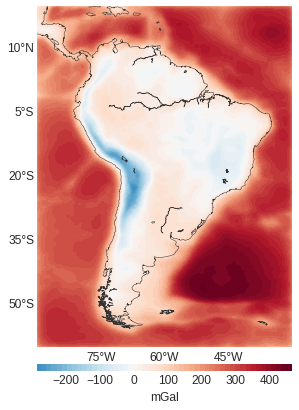

In [38]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
tmp = bm.contourf(x, y, sedfree_bouguer.reshape(shape), 50, cmap='RdBu_r',
                  **data_minmax(sedfree_bouguer))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=8))
cbax.set_xlabel('mGal')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)

plt.savefig('presentation_figures/sam-gravity-data.png', **saveargs)

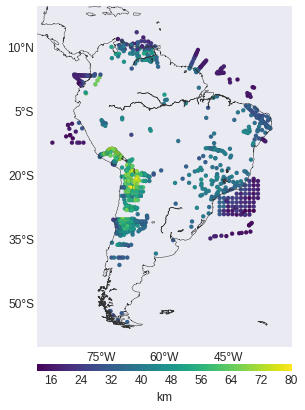

In [39]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
tmp = bm.scatter(xp, yp, c=-seismic_moho*0.001, s=18, cmap='viridis',
                 linewidths=0.05)
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=10))
cbax.set_xlabel('km')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)

plt.savefig('presentation_figures/sam-seismic-data.png', **saveargs)

## South American Moho inversion

Plot the inversion results for the South American Moho application.

First, load the inversion results that were saved to a Python pickle file. The file was large so we had to split it into two parts. To load it, we'll join the two halfs of the zipped results into a single file using some bash commands.

In [40]:
%%bash
cd results
cat south-america-moho.zip.part* > south-america-moho.zip
cd ..

Now we can load the pickled results dictionary from the combined zip file.

In [41]:
with zipfile.ZipFile('results/south-america-moho.zip') as f:
    results = pickle.load(f.open('south-america-moho.pickle'))

In [42]:
solution = results['solution']
moho = solution.estimate_

We'll use the same basemap from the previous figures.

In [43]:
xm, ym = bm(moho.lon, moho.lat)

We'll load the outlines of the main geologic provinces of South America to the basemap object so that we can plot it later in the maps.

The shapefiles were used in [Goutorbe et al. (2015)](http://dx.doi.org/10.1093/gji/ggv343) and downloaded from the Github repository [bgoutorbe/seismic-noise-tomography](https://github.com/bgoutorbe/seismic-noise-tomography).

In [44]:
bm.readshapefile('../data/south-america-provinces/SouthAmericaTectonicElements', 
                 'provinces', drawbounds=False)

(4,
 5,
 [-81.35639999999998, -53.886390999999925, 0.0, 0.0],
 [-34.79250299999992, 12.463887999999983, 0.0, 0.0])

Load the plate boundaries from [Bird (2003)](http://dx.doi.org/10.1029/2001GC000252). The files were downloaded from the website http://peterbird.name/publications/2003_PB2002/2003_PB2002.htm

In [45]:
with open('../data/south-america-provinces/PB2002_plates.dig.txt') as f:
    plates = {}
    platename = None
    tmpx, tmpy = [], []
    for line in f:
        if not line:
            continue
        if platename is None:
            platename = line.strip()
        elif "*** end of line segment ***" in line:
            plates[platename] = [np.array(tmpx), np.array(tmpy)]
            tmpx, tmpy = [], []
            platename = None
        else:
            i, j = [float(number) for number in line.split(',')]
            tmpx.append(i)
            tmpy.append(j)        

Calculate the difference with the seismological estimates and the observed gravity data.

In [46]:
diff_seismic = -0.001*(seismic_moho - predict_seismic(moho, latp, lonp))
print(diff_seismic.min(), diff_seismic.max())
print(diff_seismic.mean(), diff_seismic.std())

(-22.788392791744613, 22.78909884206325)
(1.1758194640786224, 6.8359476475916532)


In [47]:
residuals = solution[0].residuals()
xr, yr = bm(solution[0].lon, solution[0].lat)
print(residuals.min(), residuals.max())

(-28.362343001382925, 22.995475661988333)


Plot the estimated Moho depth with the major geologic provinces and plabe boundaries.

In [48]:
provinces = set([2, 9, 11])
province_labels = [
    ['SF', -44, -13],    
    ['PB', -46, -7],    
    ['BO', -39, -8],   
    ['BR', -57, -8],      
    ['PC', -56, -12.5],    
    ['PR', -51, -22],      
    ['GU', -62, 4],      
    ['GB', -68, 8],      
    ['SM', -67, -5],     
    ['AM', -58, -4],      
    ['AFB', -75, -5],      
    ['AD', -68, -21],       
    ['CH', -62, -30],        
    ['PT', -69, -41], 
]
plate_labels = [
    ['SA', -35, -25], 
    ['CO', -88, 5], 
    ['CA', -75, 15], 
    ['SC', -50, -58], 
    ['NZ', -85, -20],
    ['AN', -85, -53],
    ['AF', -35, 15],
]

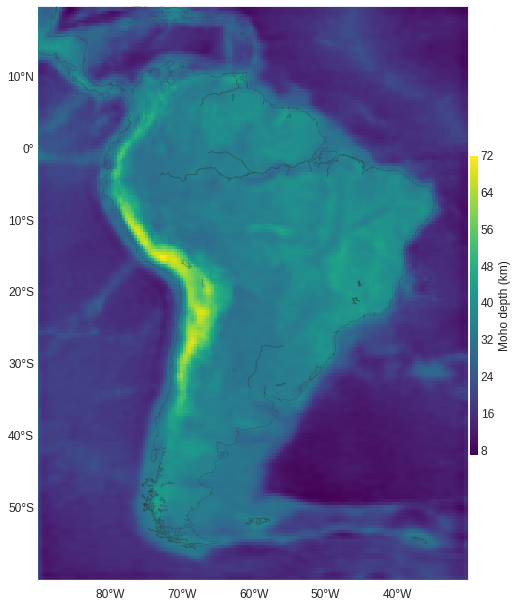

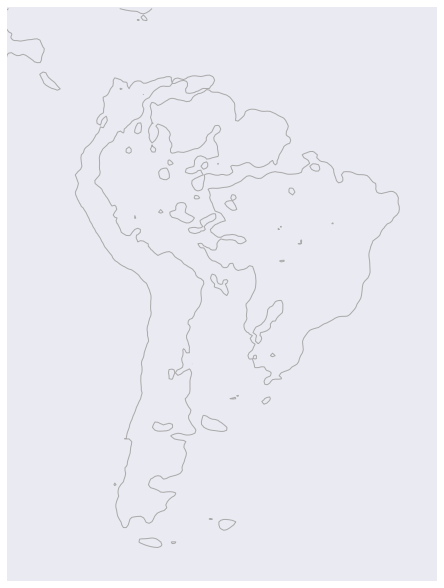

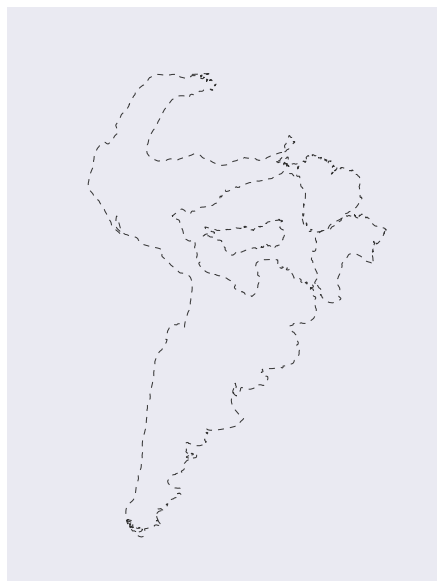

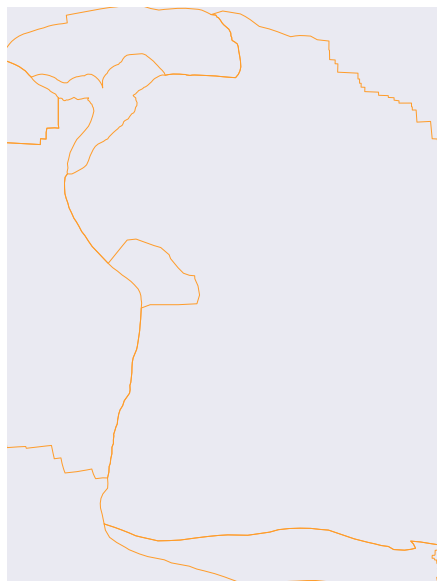

In [49]:
def draw_base():
    fig = plt.figure(figsize=(7, 8.3))
    ax = plt.axes([0.02, 0.04, 0.94, 0.96])
    bm.ax = ax
    return fig, ax

fig, ax = draw_base()
bm.drawcoastlines(color="#333333", linewidth=0.2)
bm.drawmeridians([-80, -70, -60, -50, -40], labels=[0, 0, 0, 1], 
                 linewidth=0, **config)
bm.drawparallels(np.arange(-50, 20, 10), labels=[1, 0, 0, 0], 
                 linewidth=0, **config)
tmp = bm.pcolormesh(xm, ym, -0.001*moho.relief.reshape(moho.shape), 
                    cmap='viridis')
cbax = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(tmp, cax=cbax)
cb.set_label('Moho depth (km)')
plt.savefig('presentation_figures/sam-estimate.png', **saveargs)

fig, ax = draw_base()
cs = bm.contour(xm, ym, -0.001*moho.relief.reshape(moho.shape), [35], 
                colors='#aaaaaa', linewidths=1)
plt.savefig('presentation_figures/sam-estimate-35km.png', **saveargs)

fig, ax = draw_base()
# Plot the major geologic provinces loaded from the shapefile
for i, shp in enumerate(bm.provinces):
    if i in provinces:
        xi, yi = np.transpose(shp)
        bm.plot(xi + 360, yi, color='#333333', linestyle='dashed', linewidth=1)
plt.savefig('presentation_figures/sam-estimate-provinces.png', **saveargs)
        
fig, ax = draw_base()
# Plot the boundaries of the lithospheric plates
for plate in ['SA', 'CO', 'CA', 'SC', 'NZ']:
    xi, yi = plates[plate]
    bm.plot(xi + 360, yi, color='#ff9c2a', linestyle='solid', linewidth=1)    
plt.savefig('presentation_figures/sam-estimate-plates.png', **saveargs)
        

Plot the gravity residuals and the differences with the seismological estimates.

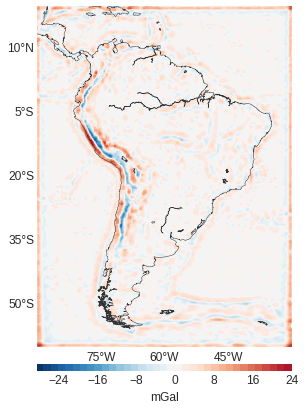

In [50]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
tmp = bm.contourf(xr, yr, residuals, 50, tri=True, cmap='RdBu_r', **data_minmax(residuals))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=8))
cbax.set_xlabel('mGal')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)

plt.savefig('presentation_figures/sam-residuals.png', **saveargs)

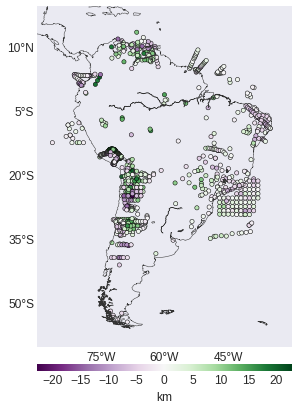

In [51]:
fig = plt.figure(figsize=(4, 5.5))

grid = AxesGrid(fig, [0.09, 0.08, 0.92, 0.92], 
                nrows_ncols=(1, 1), axes_pad=0.05,
                cbar_location="bottom", cbar_mode="each",
                cbar_size="2%", cbar_pad="5%")

i = 0
ax, bm.ax, cbax = grid[i], grid[i], grid.cbar_axes[i]
tmp = bm.scatter(xp, yp, c=diff_seismic, s=18, cmap=plt.cm.PRGn,
                 linewidths=0.5, **data_minmax(diff_seismic))
cb = cbax.colorbar(tmp, locator=ticker.MaxNLocator(nbins=10))
cbax.set_xlabel('km')
bm.drawmeridians([-75, -60, -45], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0, **config)
bm.drawcoastlines(color="#333333", linewidth=0.5)

plt.savefig('presentation_figures/sam-seismic-diff.png', **saveargs)

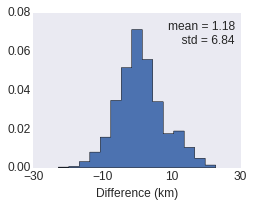

In [52]:
with seaborn.axes_style('dark'):
    fig = plt.figure(figsize=(3.7, 3))
    ax = plt.subplot(111)    
    text = "mean = {:.2f}\n    std = {:.2f}".format(
        diff_seismic.mean(), diff_seismic.std())
    ax.text(0.65, 0.8, text, transform=ax.transAxes, **config)
    ax.hist(diff_seismic, bins=15, normed=True, histtype='stepfilled')
    ax.set_xlabel('Difference (km)')
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_yticks(ax.get_yticks()[::2])
    plt.tight_layout()

plt.savefig('presentation_figures/sam-seismic-diff-hist.png', **saveargs)

Plot the cross-validation results.

In [53]:
regul_params = results['regul_params']
scores_regul = results['scores_regul']
best_reg = results['best_regul']
reference_levels = results['reference_levels']
densities = results['densities']
scores_refdens = results['scores_refdens']
best_ref = results['best_ref']
best_dens = results['best_dens']

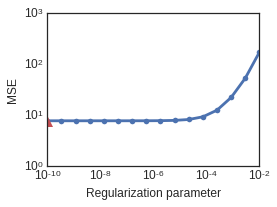

In [54]:
with seaborn.axes_style('white'):
    fig = plt.figure(figsize=(4, 3))
    ax = plt.subplot(111)
    ax.plot(regul_params, scores_regul, marker='.')
    ax.plot(regul_params[best_reg], scores_regul[best_reg], '^', 
            color=seaborn.color_palette()[2], 
            label='Minimum')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Regularization parameter')
    ax.set_ylabel(u'MSE')
    ax.set_xticks(ax.get_xticks()[1:-1:2])
    plt.tight_layout()

plt.savefig('presentation_figures/sam-cv-mu.png', **saveargs)

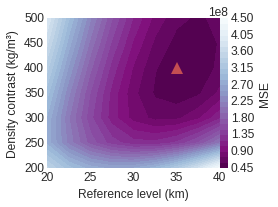

In [55]:
with seaborn.axes_style('darkgrid'):
    fig = plt.figure(figsize=(4, 3))
    ax = plt.subplot(111)    
    tmp = ax.contourf(-0.001*reference_levels, densities, scores_refdens, 30, cmap='BuPu_r')
    divider = make_axes_locatable(ax)
    cbax = divider.append_axes("right", size=0.1, pad=0.01)
    cb = plt.colorbar(tmp, cax=cbax)
    cb.set_label('MSE')
    ax.plot(-0.001*reference_levels[best_ref], densities[best_dens], '^', 
            color=seaborn.color_palette()[2], label='Minimum')
    ax.set_xlabel('Reference level (km)')
    ax.set_ylabel(u'Density contrast (kg/m³)')    
    plt.tight_layout()

plt.savefig('presentation_figures/sam-cv-drhozref.png', **saveargs)

[]()